Need to show two solutions are unstable since they do not occur in simulations.

In [1]:
from functions import Spectral, polyeig
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_settting

In [2]:
# domain information
N = 201 # number of points
domain = "symmetric"
method = "FD"
spectral = Spectral(N,domain,method)

x = np.linspace(-1,1,N)
D1 = spectral.D1
D2 = spectral.D2

In [3]:
v0 = 1.5

A2 = np.eye(N,dtype=complex)
A1 = 2j*v0*D1
A0 = (1-v0**2)*D2

# remove boundaries because derivatives behave bad there
A2 = A2[1:-1,1:-1]
A1 = A1[1:-1,1:-1]
A0 = A0[1:-1,1:-1]

[0.12666428-3.73485567e+01j 1.93043214-2.04495042e+02j
 1.96405462+5.82241430e-13j 3.75192046-1.53811008e+02j
 3.93147161+2.68506396e-12j 4.25832505+9.29290955e+01j
 4.26376283+1.79872707e+02j 5.90564926+2.69665485e-12j
 6.08651401-2.04428049e+02j 7.33716903-3.68272394e+01j]
[ 1.96349541  3.92699082  5.89048623  7.85398163  9.81747704 11.78097245
 13.74446786 15.70796327 17.67145868]


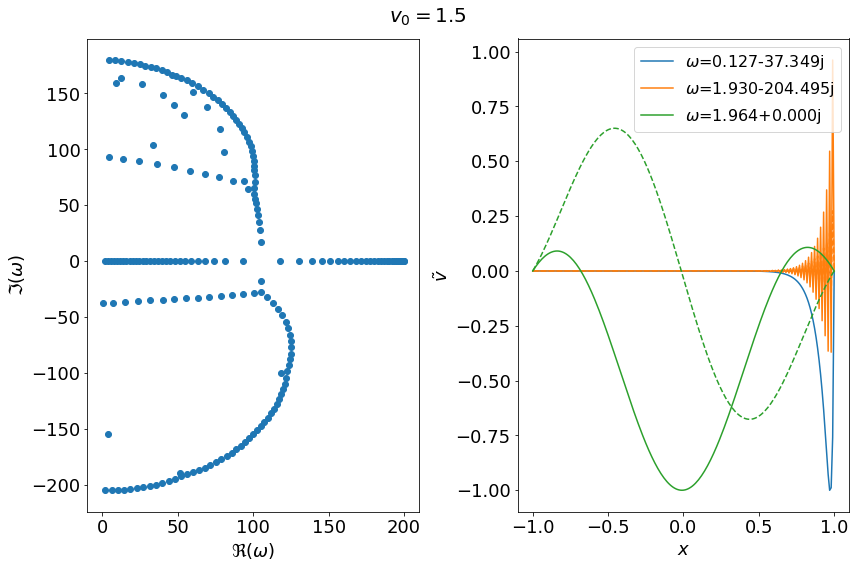

In [4]:
V, omega = polyeig(A0, A1, A2)
V = np.pad(V, ((1,1),(0,0)), 'constant', constant_values=0) # Dirichlet boundary

selection = (np.real(omega)>1e-1) #& (np.abs(np.imag(omega)) > 1)
V = V[:,selection]
omega = omega[selection]

# sort
ind = np.argsort(np.real(omega))
omega = omega[ind]
V = V[:,ind]

plt.figure(figsize=(12,8))
plt.subplot(121)
plt.plot(np.real(omega), np.imag(omega), 'o')
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$")

plt.subplot(122)
for i in range(3):
    v = V[:,i]
    line = plt.plot(x, np.real(v), label=f"$\omega$={omega[i]:.3f}")
    plt.plot(x, np.imag(v), '--', color=line[0]._color)

plt.xlabel("$x$")
plt.ylabel("$\\tilde{v}$")
plt.legend()
plt.suptitle(f"$v_0={v0}$")
plt.tight_layout()

print(omega[:10])
print(np.abs(1-v0**2)*np.pi/2*np.arange(1,10))

In [6]:
# remove bad eigenfunctions
from scipy.interpolate import interp1d
xx = np.linspace(-1,1,5*N)
f = interp1d(spectral.x, V.T)
zeros = np.isclose(f(xx).T, 0, atol=1e-3).sum(axis=0)
omega = omega[zeros<int(spectral.N/10)]
V = V[:,zeros<int(spectral.N/10)]

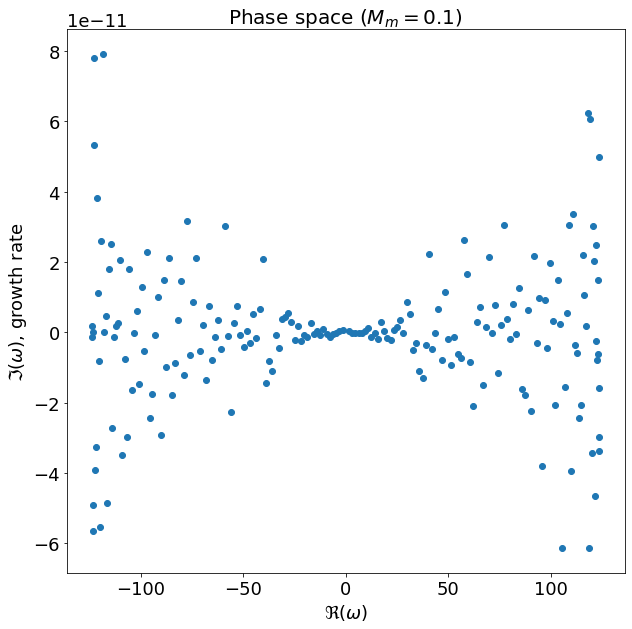

In [7]:
# phase space
plt.figure()
selection = (np.abs(np.real(omega))<10) & (np.abs(np.imag(omega))<10)
omega_ = omega#[selection]

plt.plot(np.real(omega_), np.imag(omega_), 'o')
#plt.plot(np.real(omega), np.imag(omega), 'o')
plt.xlabel("$\Re(\omega)$")
plt.ylabel("$\Im(\omega)$, growth rate")
if (Mm == 1) & (acclerting):
    plt.title(f"Phase space ($M_m={Mm}$, accelerating)");
elif (Mm == 1) & (not acclerting):
    plt.title(f"Phase space ($M_m={Mm}$, decelerating)");
else:
    plt.title(f"Phase space ($M_m={Mm}$)");
plt.savefig("phase-space")

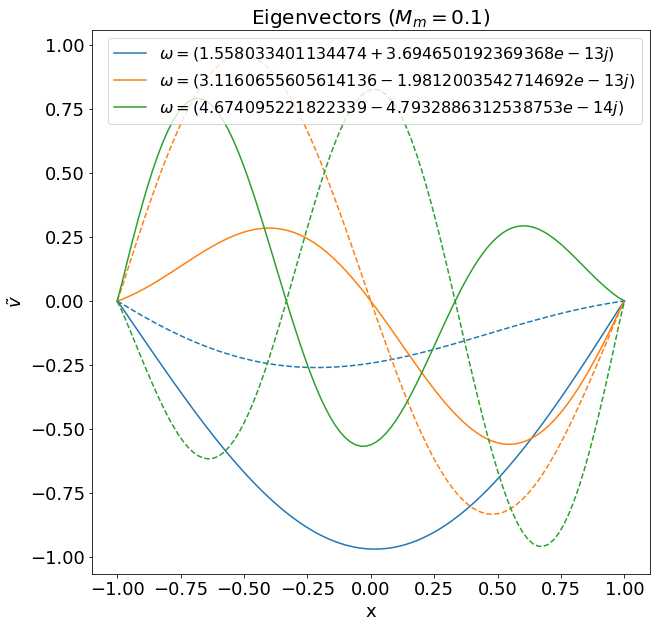

In [8]:
# eigenvectors
plt.figure()
#selection = (np.abs(np.real(omega))<10) & (np.abs(np.imag(omega))<10) 
selection = np.real(omega) >= 0
omega_ = omega[selection]
V_ = V[:, selection]

# zeros = np.isclose(V_, 0, atol=1e-3).sum(axis=0)
# omega_ = omega_[zeros<int(spectral.N/10)]
# V_ = V_[:,zeros<int(spectral.N/10)]

ind = np.argsort(np.abs(np.real(omega_)))
omega_ = omega_[ind]
V_ = V_[:,ind]

size = 3 if omega_.size > 3 else omega_.size
for i in range(size):
    lines = plt.plot(spectral.x, np.real(V_[:,i]), label=f"$\omega={omega_[i]}$")
    plt.plot(spectral.x, np.imag(V_[:,i]), '--', color=lines[0]._color)
plt.xlabel("x")
plt.ylabel("$\\tilde{v}$")
plt.title(f"Eigenvectors ($M_m={Mm}$)")
plt.legend();
plt.savefig("eigenfunctions")

In [9]:
print("numeric results:", omega_[:10])
print()

numeric results: [ 1.5580334 +3.69465019e-13j  3.11606556-1.98120035e-13j
  4.67409522-4.79328863e-14j  6.23212109-2.75707319e-13j
  7.79014182-3.20692812e-13j  9.34815596+4.18689608e-13j
 10.90616186+1.30229676e-12j 12.46415768-1.22798181e-12j
 14.02214117-2.79390978e-13j 15.58010963-1.77173804e-12j]

